In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import necessary libraries\n
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Read the file "Advertising.csv"
df = pd.read_csv("Advertising.csv")

# Set \'Sales\' as the predictor variable
y = df['Sales']
       
# Function to fit a linear model on the predictor passed as a parameter, compute the parameters and plot the fit of the R^2
def fit_and_plot_linear(x):
    # Split the data into train and test sets with train size of 0.8
    #Set the random state as 0 to get reproducible results
    x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=0)
    # Initialize a LinearRegression object
    lreg = LinearRegression()
    # Fit the model on the train data
    lreg.fit(x_train, y_train)
    # Predict the response variable of the train set using the trained model
    y_train_pred = lreg.predict(x_train)
    # Predict the response variable of the test set using the trained model
    y_test_pred= lreg.predict(x_test)
    # Compute the R-square for the train predictions
    r2_train = r2_score(y_train, y_train_pred)
    # Compute the R-square for the test predictions
    r2_test = r2_score(y_test, y_test_pred)
    # Code to plot the prediction for the train and test data
    plt.scatter(x_train, y_train, color='#B2D7D0', label = "Train data")
    plt.scatter(x_test, y_test, color='#EFAEA4', label = "Test data")
    plt.plot(x_train, y_train_pred, label="Train Prediction", color='darkblue', linewidth=2)
    plt.plot(x_test, y_test_pred, label="Test Prediction", color='k', alpha=0.8, linewidth=2, linestyle='--')
    name = x.columns.to_list()[0]
    plt.title(f"Plot to indicate linear model predictions")
    plt.xlabel(f"{name}", fontsize=14)
    plt.ylabel("Sales", fontsize=14)
    plt.legend()
    plt.show()
    # Return the r-square of the train and test data
    return r2_train, r2_test
# Function to fit a multilinear model on all the predictors in the dataset passed as a parameter, compute the parameter and plot the fit of the R^2
def fit_and_plot_multi():
    # Get the predictor variables
    x = df[['TV','Radio','Newspaper']]
    # Split the data into train and test sets with train size of 0.8 Set the random state as 0 to get reproducible results\n\t
    x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=0)
    # Initialize a LinearRegression object to perform Multi-linear regression\n\t
    lreg = LinearRegression()
    # Fit the model on the train data\n\t
    lreg.fit(x_train, y_train)
    # Predict the response variable of the train set using the trained model
    y_train_pred = lreg.predict(x_train)
    # Predict the response variable of the test set using the trained model
    y_test_pred= lreg.predict(x_test)
    # Compute the R-square for the train predictions\n\t
    r2_train = r2_score(y_train, y_train_pred)
    # Compute the R-square for the test predictions\n\t
    r2_test = r2_score(y_test, y_test_pred)
    # Return the r-square of the train and test data\n\t
    return r2_train, r2_test

In [3]:
# Read the file "Advertising.csv"
df = pd.read_csv("Advertising.csv")

# Take a quick look at the dataframe
df.head()

# Drop column 'Unnamed: 0'
df = df.drop('Unnamed: 0', axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
# Define an empty Pandas dataframe to store the R-squared value associated with each 
# predictor for both the train and test split
df_results = pd.DataFrame(columns=['Predictor', 'R2 Train', 'R2 Test'])

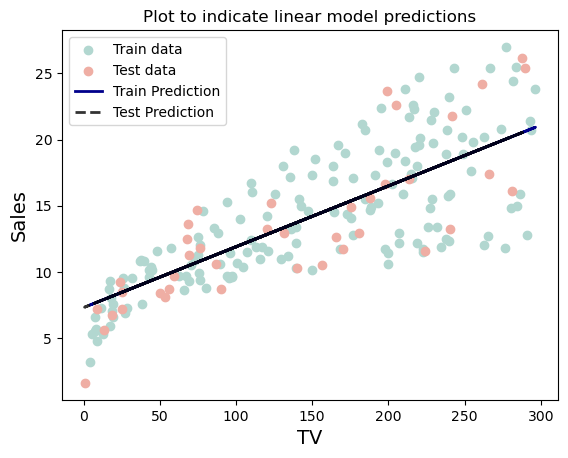

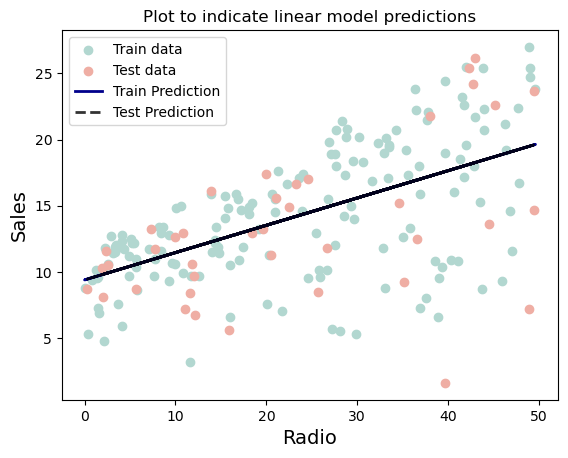

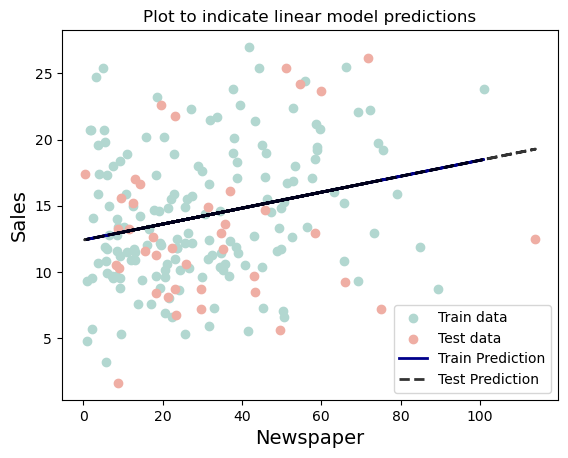

In [5]:
# For each predictor in the dataframe, call the function "fit_and_plot_linear()"
# from the helper file with the predictor as a parameter to the function

# This function will split the data into train and test split, fit a linear model
# on the train data and compute the R-squared value on both the train and test data

# **Your code here**
predictors = [col for col in df.columns if col != 'Sales']

for predictor in predictors:
    x = df[[predictor]]
    r2_train, r2_test = fit_and_plot_linear(x)
    #print(r2_test, r2_train)
    new_row = pd.DataFrame({'Predictor': [predictor], 'R2 Train': [r2_train], 'R2 Test': [r2_test]})
    df_results = pd.concat([df_results, new_row], ignore_index=True)


In [6]:
# Call the function "fit_and_plot_multi()" from the helper to fit a multilinear model
# on the train data and compute the R-squared value on both the train and test data

# **Your code here**
(r2_train_multi, r2_test_multi) = fit_and_plot_multi()

In [7]:
fit_and_plot_multi()

(0.9067114990146383, 0.8601145185017869)

In [8]:
### edTest(test_dataframe) ###

# Store the R-squared values for all models
# in the dataframe intialized above
# **Your code here**

new_row = pd.DataFrame({'Predictor': 'Multiple Predictors', 'R2 Train': r2_train_multi, 'R2 Test': r2_test_multi}, index=[4])
df_results = pd.concat([df_results, new_row], ignore_index=True)

# Take a quick look at the dataframe
df_results.head()


,Predictor,R2 Train,R2 Test
0,TV,0.588474,0.676315
1,Radio,0.356718,0.229817
2,Newspaper,0.064416,-0.021217
3,Multiple Predictors,0.906711,0.860115


Fitting a multiregression model

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
#from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [11]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [12]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [13]:
### edTest(test_mse) ###

# Initialize a list to store the MSE values
mse_list = []

# Create a list of lists of all unique predictor combinations
# For example, if you have 2 predictors,  A and B, you would 
# end up with [['A'],['B'],['A','B']]
cols = [['TV'], ['Radio'], ['Newspaper'], ['TV', 'Radio'], ['TV', 'Newspaper'], ['Radio', 'Newspaper'], ['TV', 'Radio', 'Newspaper']]

# Loop over all the predictor combinations 
for i in cols:

    # Set each of the predictors from the previous list as x
    x = df[i]
    
    # Set the "Sales" column as the reponse variable
    y = df['Sales']
   
    # Split the data into train-test sets with 80% training data and 20% testing data. 
    # Set random_state as 0
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

    # Initialize a Linear Regression model
    lreg = LinearRegression()

    # Fit the linear model on the train data
    lreg.fit(x_train, y_train)

    # Predict the response variable for the test set using the trained model
    y_pred = lreg.predict(x_test)
    
    # Compute the MSE for the test data
    MSE = mean_squared_error(y_test, y_pred)
    
    # Append the computed MSE to the initialized list
    mse_list.append(MSE)


In [14]:
for i in range(len(mse_list)):
    print(cols[i], round(mse_list[i],3))

['TV'] 10.186
['Radio'] 24.237
['Newspaper'] 32.137
['TV', 'Radio'] 4.391
['TV', 'Newspaper'] 8.688
['Radio', 'Newspaper'] 24.783
['TV', 'Radio', 'Newspaper'] 4.402
